In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [ ]:
# Шаг 1. Получите финансовые данные из онлайн-источника
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'FB']  # Список символов тикера
start_date = '2019-01-01'  # Дата начала получения данных
end_date = '2024-01-01'  # Дата окончания получения данных

In [ ]:
# Получить исторические данные о ценах с помощью библиотеки yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted


In [ ]:
# Шаг 2. Предварительная обработка и анализ данных
# Рассчитайте возвраты и сохраните их в новом DataFrame
returns = data.pct_change().dropna()

In [ ]:
# Рассчитать среднюю доходность и ковариационную матрицу
mean_returns = returns.mean()
cov_matrix = returns.cov()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
# Шаг 3: Определите функцию оптимизации
def portfolio_optimization(weights, mean_returns, cov_matrix):
    # Рассчитать доходность портфеля
    portfolio_return = np.sum(mean_returns * weights)

    # Рассчитать риск портфеля (стандартное отклонение)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Верните отрицательный коэффициент Шарпа в качестве цели, которую нужно минимизировать.
    sharpe_ratio = portfolio_return / portfolio_risk
    return -sharpe_ratio

In [ ]:
# Шаг 4. Выполните оптимизацию портфеля
num_assets = len(tickers)  # Количество активов в портфеле
initial_weights = np.ones(num_assets) / num_assets  # Равные начальные веса

In [ ]:
# Установите границы оптимизации: веса от 0 до 1
bounds = [(0, 1)] * num_assets

In [ ]:
# Выполните оптимизацию портфеля с помощью функции минимизации из SciPy.
result = minimize(portfolio_optimization, initial_weights, args=(mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}))

In [ ]:
# Извлечение оптимизированных весов из результата
optimized_weights = result.x

In [ ]:
# Рассчитать оптимизированные показатели портфеля
portfolio_return = np.sum(mean_returns * optimized_weights)
portfolio_risk = np.sqrt(np.dot(optimized_weights.T, np.dot(cov_matrix, optimized_weights)))

Text(0.5, 1.0, 'Распределение портфеля')

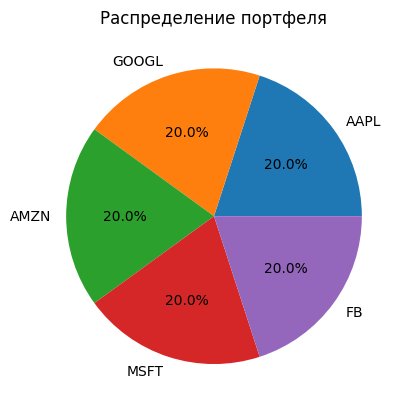

In [ ]:
# Шаг 5. Визуализируйте результаты
# Создайте круговую диаграмму для отображения распределения портфеля
fig, ax = plt.subplots()
ax.pie(optimized_weights, labels=tickers, autopct='%1.1f%%')
ax.set_aspect('equal')
ax.set_title('Распределение портфеля')

In [ ]:
# Отображение оптимизированных показателей портфеля
print(f"Оптимизированная доходность портфеля: {portfolio_return:.4f}")
print(f"Оптимизированный риск портфеля: {portfolio_risk:.4f}")

Оптимизированная доходность портфеля: 0.0000
Оптимизированный риск портфеля: nan


In [ ]:
# Show the pie chart
plt.show()